# Projek menganalisis dataset bank untuk menentukan klien yang akan menjadi nasabah deposito

Pertanyaan yang ingin dijawab oleh saya sebagai Analis data, yaitu:
1. Kolom/atribut apa saja yang menjadi faktor klien akan menjadi nasabah deposito?
2. model apa yang paling terbaik dalam menentukan klien akan menjadi nasabah deposito?

In [1]:
#import library yang akan digunakan

import numpy as np # linear algebra
import pandas as pd # data processing

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#data encoding, imputing, and model building and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
# Membaca dataset
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Melihat korelasi antara kolom/atribut menggunakan heatmap

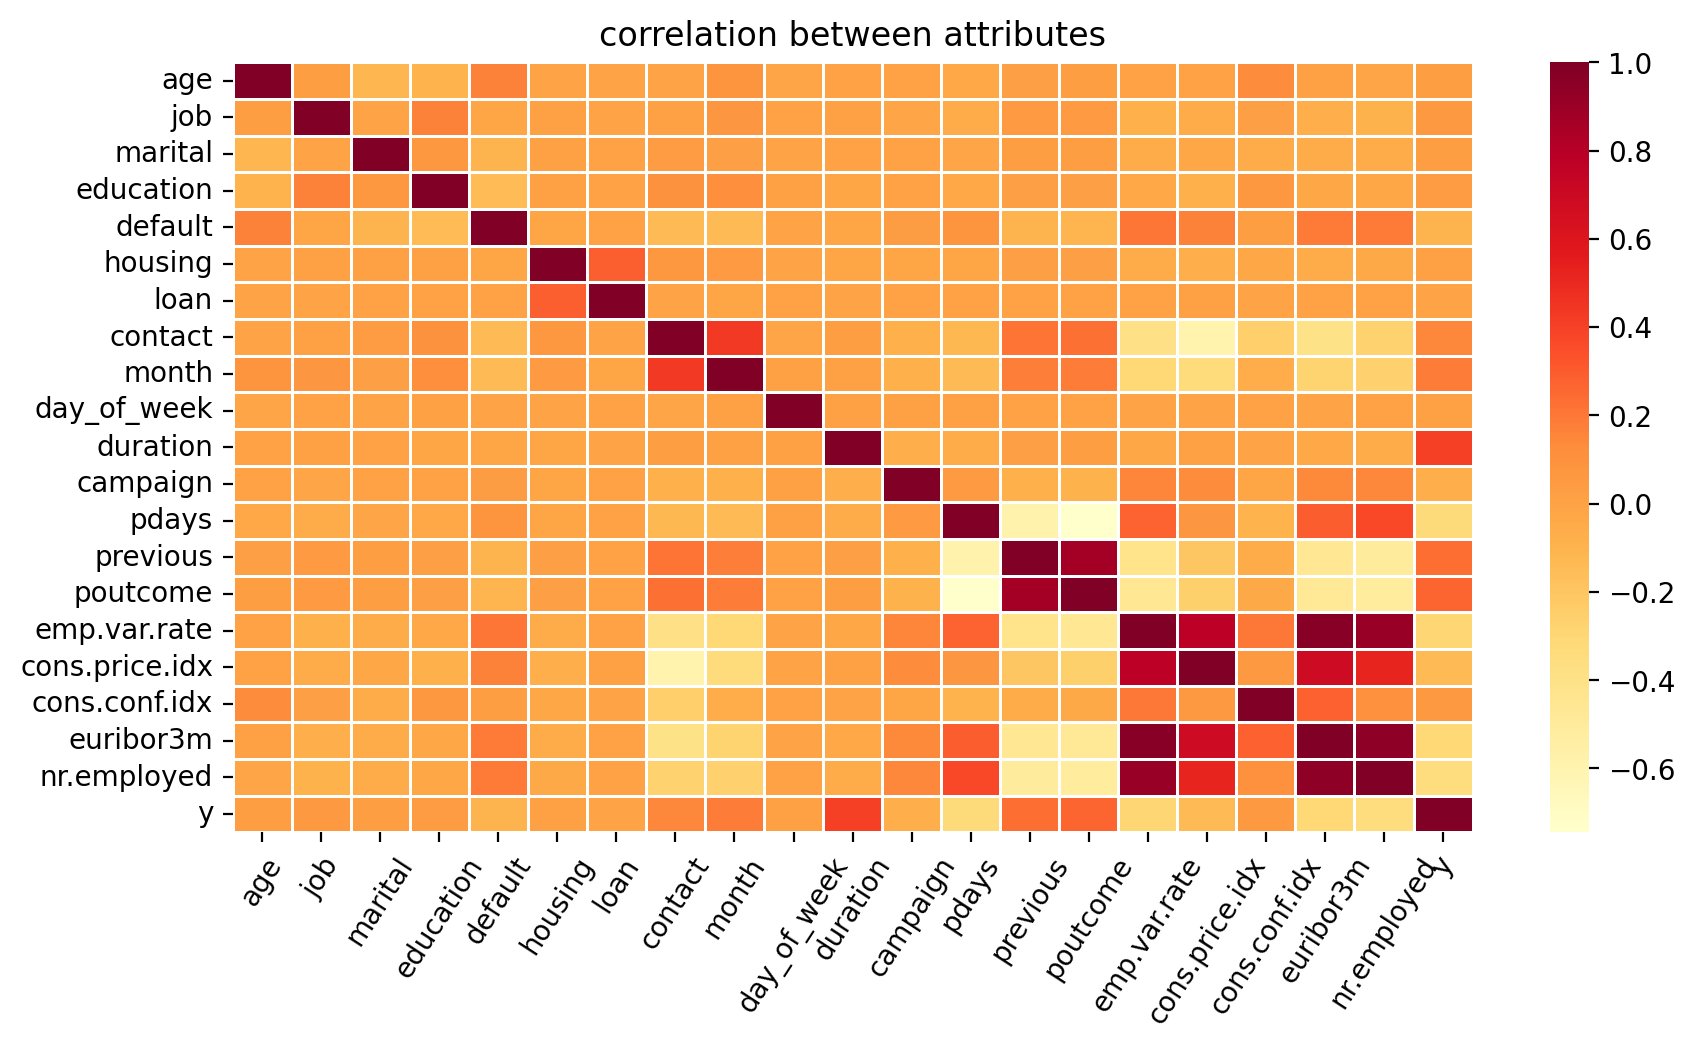

In [4]:
df_2=df.copy()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i]=pd.factorize(df[i])[0]

plt.figure(figsize=(10, 5),dpi=200)
plt.title('correlation between attributes')
sns.heatmap(df.corr(),lw=1,linecolor='white',cmap='YlOrRd')
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df.corr()
#print(corr_matrix)

diatas merupakan grafik Correlation Matrix Heatmap yang digunakan untuk melihat atribut mana saja yang memiliki korelasi dengan atribut lain, dapat dilihat bahwa atribut yang memiliki korelasi paling dekat yaitu :
1. Housing dengan loan
2. month dengan contact
3. previous dengan poutcome
4. terdapat 5 atribut yang sangat saling korelasi yaitu atribut emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m dan nr.employed
dan atribut yang sangat memiliki korelasi dengan atribut y, yaitu atribut duration, previous dan poutcome, sehingga dapat disimpulkan atribut yang menjadi faktor klien akan menjadi nasabah deposito yaitu atrbiut duration, previous dan poutcome

# data cleanup

In [5]:
import warnings
warnings.filterwarnings('ignore')
df=df.drop(["month","day_of_week","contact"],axis=1)
df["education"]=df["education"].replace(['basic.4y','high.school','basic.6y','basic.9y','professional.course','university.degree','illiterate',"unknown"],[4,12,6,9,14,17,0,np.nan])
df.housing[df['housing']=='no']=0
df.housing[df['housing']=='yes']=1
df.housing[df['housing']=='unknown']=np.nan
df.loan[df['loan']=='no']=0
df.loan[df['loan']=='yes']=1
df.loan[df['loan']=='unknown']=np.nan
df["loan"]=df["loan"]+df["housing"]
df.drop("housing",axis=1)
#df=df.replace('unknown',-999)


,age,job,marital,education,default,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,334,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,383,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,6,0,1,189,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,442,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


disini saya melakukan data cleanup dengan beberapa cara yaitu:
1. menghapus kolom-kolom yang ditentukan ("month", "day_of_week", "contact", dan "housing) dari DataFrame
2. mengganti nilai-nilai dalam kolom "education" berdasarkan pemetaan yang ditentukan. Nilai string asli diganti dengan nilai numerik yang sesuai. 'unknown' diganti dengan np.nan, yang mewakili nilai yang hilang.
3. mmemperbarui nilai-nilai dalam kolom "housing" dan "loan". Menggantikan 'no' dengan 0, 'yes' dengan 1, dan 'unknown' dengan np.nan. Kolom-kolom ini kemudian dianggap sebagai nilai biner (0 atau 1) atau nilai yang hilang.
4. menambahkan nilai-nilai dalam kolom "loan" dan "housing" secara elemen. dengan menggabungkan kedua kolom ini menjadi satu kolom "loan". 
5. mengganti semua kemunculan string 'unknown' dalam DataFrame dengan nilai numerik -999

# menghilangkan outliers

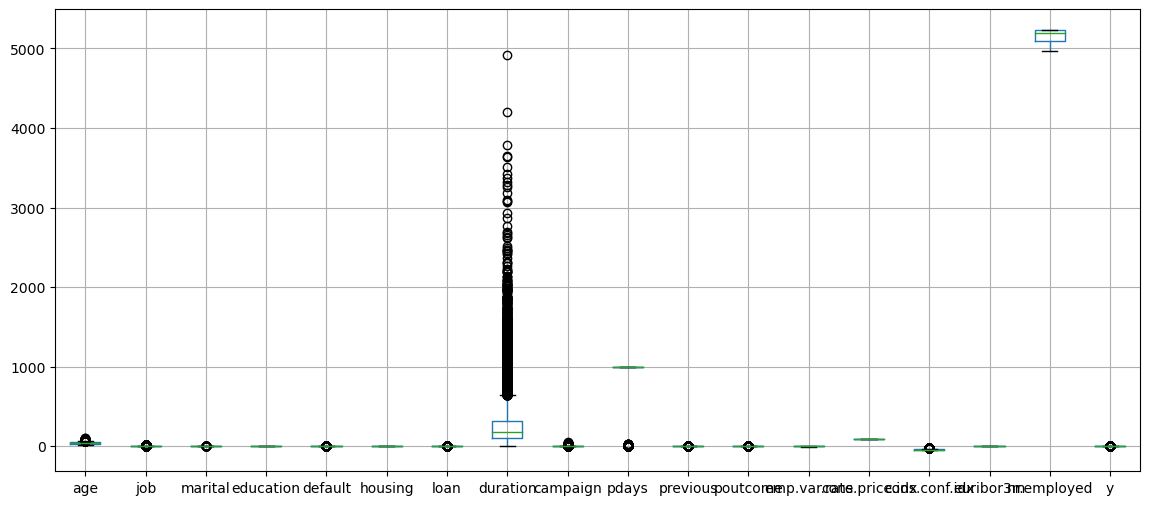

In [6]:
plt.figure(figsize=(14,6))
df.boxplot()
print()

dapat dilihat bahwa dataframe ini memiliki banyak data outliers yang akan berdampak pada Model yang dibangun, karena model akan memperhitungkan outliers yang dapat memberikan prediksi yang buruk untuk data baru yang tidak termasuk dalam sampel pelatihan. Outliers dapat menyebabkan model kurang dapat diandalkan dan kurang mampu menggeneralisasi.

<Axes: ylabel='cons.conf.idx'>

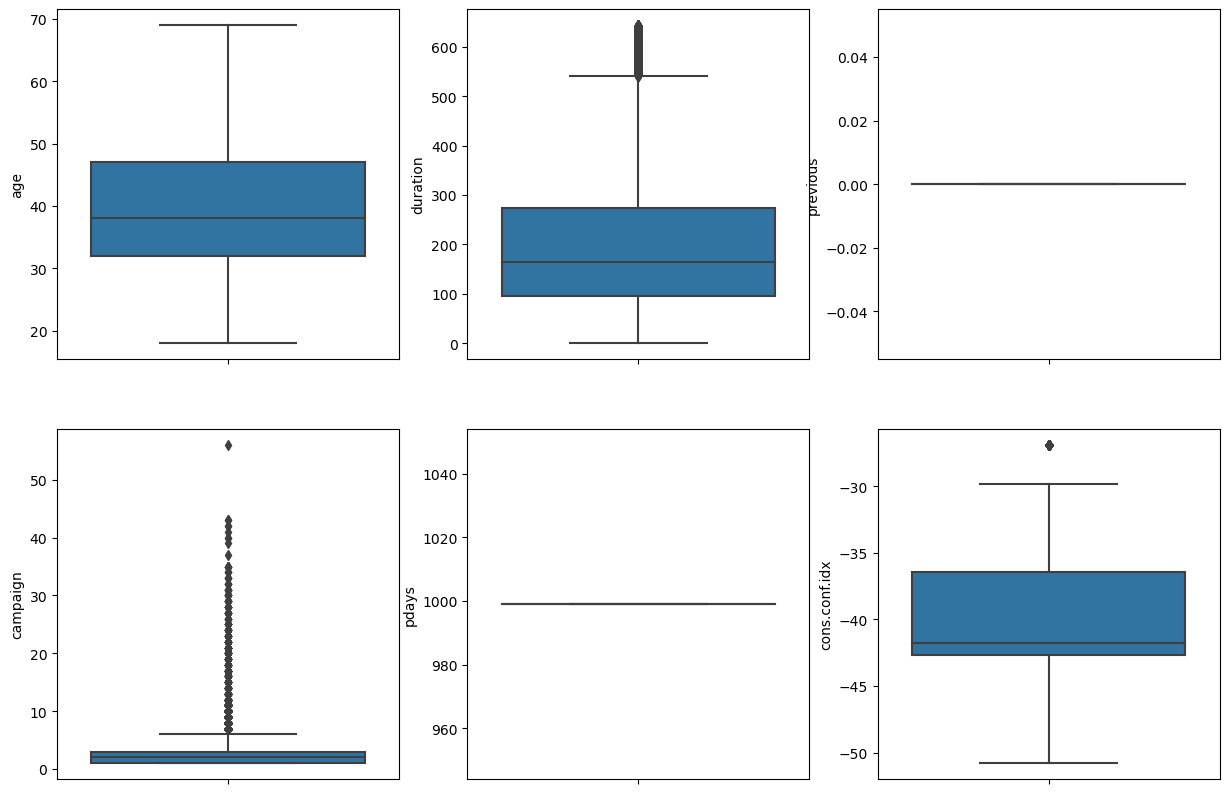

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
sns.boxplot(y=df["age"],ax=axs[0][0])
sns.boxplot(y=df["duration"],ax=axs[0][1])
sns.boxplot(y=df["previous"],ax=axs[0][2])
sns.boxplot(y=df["campaign"],ax=axs[1][0])
sns.boxplot(y=df["pdays"],ax=axs[1][1])
sns.boxplot(y=df["cons.conf.idx"],ax=axs[1][2])

pada grafik ini kita bisa melihat outliers pada atribut "age", "duration", "previous" ,"Campaign", "pdays" dan "cons.conf.idx", kita bisa melihat pada atribut "age", "duration" dan "Campaign" banyak data outliers dan harus di seimbangkan

In [8]:
Q1 = df['duration'].quantile(.25)
Q3 = df['duration'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['duration'] >= lower] 
df = df[df['duration'] <=upper]

Q1 = df['age'].quantile(.25)
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['age'] >= lower] 
df = df[df['age'] <=upper] 

Q1 = df['previous'].quantile(.25)
Q3 = df['previous'].quantile(.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[df['previous'] >= lower] 
df = df[df['previous'] <=upper]

disini saya menghilangkan data outliers pada atribut "duration", "age" dan "previous"

# Menyeimbangkan Dataset

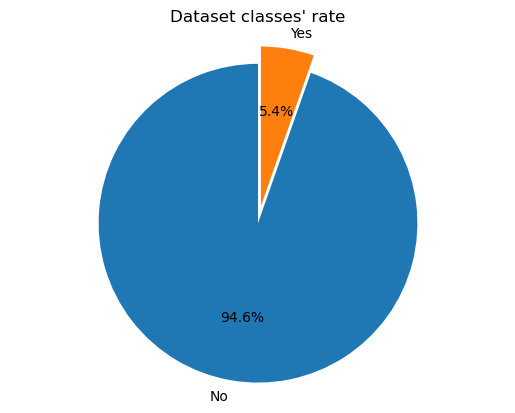

In [10]:
values=df["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

disini dapat terlihat bahwa klien yang menjadi nasabah deposit sebesar 11,3% yang menyebabkan dataset ini sangat tidak seimbang

In [11]:
df["y"]=df["y"].replace("no",0)
df["y"]=df["y"].replace("yes",1)
df_classe_majority = df[df.y==0]
df_classe_minority = df[df.y==1]
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples =df_classe_majority.shape[0],   
                                           random_state = 150) 
df = pd.concat([df_classe_majority, df_classe_minority_upsampled])
Y = df["y"]
X = df.drop(['y'], axis=1)

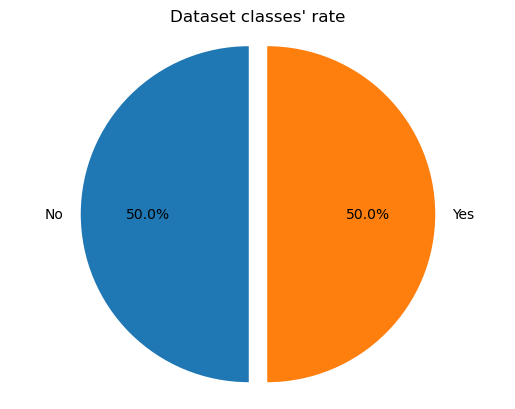

In [12]:
values=df["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
scale=values[0]/values[1]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()


disini kita dapat melihat bahwa dataset kita telah seimbang dengan persentase antara yes dan no masing masing sebesar 50%

# membuat categorical columns variabel X

In [12]:
categoricals=['job','marital','default','poutcome','campaign']
labelencoder = LabelEncoder()
for c in categoricals:
    X[c]      = labelencoder.fit_transform(X[c]) 
X.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,0,0,0,0,0,0,261,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1,1,0,0,149,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1,0,1,1,226,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,2,0,2,0,0,0,151,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1,0,0,1,307,0,999,0,0,1.1,93.994,-36.4,4.857,5191.0


# Mengisi missing values menggunakan KNNImputer

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

# Membangun, melatih dan melakukan test pada model 

In [14]:
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# membuat model Decision Tree

In [15]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()


Accuracy: 0.9792



# membuat model Logistic Regression

In [16]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create the logistic regression classifier with 'l2' penalty
classifier = LogisticRegression()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(accuracy_LR))
print()

Accuracy: 0.8536



# membuat model KNN

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(accuracy_KNN))
print()

Accuracy: 0.4977



# Membuat Model Naive Bayes

In [18]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(accuracy_NB))
print()

Accuracy: 0.5023



dapat dilihat bahwa akurasi tertinggi dicapai pada model Decision Tree sebesar 0.9792

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, r2_score, classification_report
k_fold = KFold(n_splits=7, shuffle=False, random_state=None)
print("Mean accuracy",(cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()))
print(classification_report(y_test, y_dtc_pred))

Mean accuracy 0.9769582265709555
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9248
           1       0.96      1.00      0.98      9334

    accuracy                           0.98     18582
   macro avg       0.98      0.98      0.98     18582
weighted avg       0.98      0.98      0.98     18582



# Feature Importances (fitur (variabel) pada model yang berkontribusi terhadap kemampuan model untuk membuat prediksi)

Text(0.5, 0, 'Relative Importance')

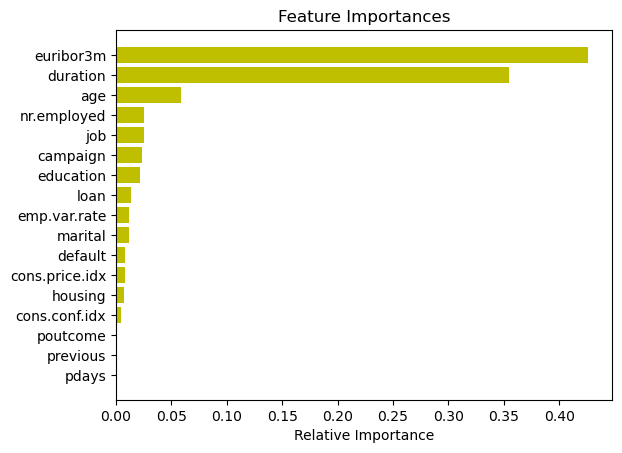

In [20]:
features=X.columns
importances =dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Dari grafik Feature Importances di atas, kita melihat bahwa tingkat Libor Eropa ('euribor3m'), durasi ('duration'), usia klien ('age'), jumlah pegawai ('nr.employed'), pekerjaan ('job'), jumlah kontak klien selama kampanye pemasaran saat ini ('campaign') dan pendidikan ('education') adalah fitur-fitur penting yang memengaruhi keputusan pelanggan untuk membeli atau tidak membeli deposito berjangka.

Jawaban dari Pertanyaan 
1. Kolom/atribut apa saja yang menjadi faktor klien akan menjadi nasabah deposito? atribut yang menjadi faktor terbesar klien akan menjadi nasabah deposito yaitu atribut tingkat Libor Eropa ('euribor3m'), durasi ('duration'), usia klien ('age'), jumlah pegawai ('nr.employed'), pekerjaan ('job'), jumlah kontak klien selama kampanye pemasaran saat ini ('campaign') dan pendidikan ('education')
2. model apa yang paling terbaik dalam menentukan klien akan menjadi nasabah deposito? model paling terbaik dalam menentukan klien akan menjadi nasabah deposito yaitu model Decision Tree